In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data.waterfront.unique()

array([0, 1])

In [4]:
data=data[['price','bedrooms','bathrooms','sqft_living','floors','waterfront']]
data.head(2)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,313000.0,3.0,1.5,1340,1.5,0
1,2384000.0,5.0,2.5,3650,2.0,0


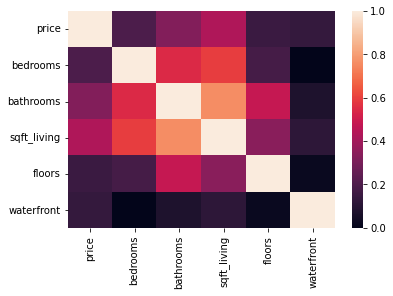

In [7]:
corr=data.corr()
sns.heatmap(corr)

In [8]:
X=data.iloc[:,1:]
Y=data['price'].to_list()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)


In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [20]:
y_pred=lr.predict(X_test)


In [21]:
y_pred

array([454340.96313947, 800451.61405077, 504370.78601079, ...,
       646465.12013182, 804635.76388091, 646045.48255438])

In [22]:
y_pred.shape

(1150,)

In [24]:
np.array(y_test).shape

(1150,)

In [29]:
a=X.iloc[0].to_list()
a

[3.0, 1.5, 1340.0, 1.5, 0.0]

In [31]:
lr.predict([a])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([347614.77047863])

In [34]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(lr, files)

In [35]:
# load saved model
with open('model.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [36]:
lr.predict(X_test)

array([454340.96313947, 800451.61405077, 504370.78601079, ...,
       646465.12013182, 804635.76388091, 646045.48255438])